IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

LOADING THE DATASET

In [3]:
df= pd.read_csv('/content/sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


DATA EXPLORATION

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


DATA CLEANING

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
df = df[(df["BMI"] > 0) & (df["Glucose"] > 0)]


In [14]:
(df == 0).sum()


,0
Pregnancies,108
Glucose,0
BloodPressure,28
SkinThickness,218
Insulin,360
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,488


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,69.704787,20.715426,81.348404,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,18.322255,15.930487,115.925034,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


EXPLORATORY DATA ANALYSIS

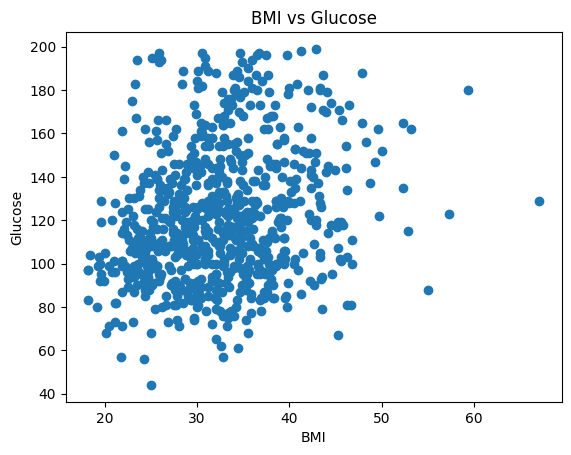

In [16]:
plt.scatter(df['BMI'], df['Glucose'])
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('BMI vs Glucose')
plt.show()

Check correlation between BMI and Glucose parameters

In [17]:
df[['BMI','Glucose']].corr()

,BMI,Glucose
BMI,1.000000,0.232771
Glucose,0.232771,1.000000


LINEAR REGRESSION MODEL

In [18]:
X= df[['BMI']]
Y= df[['Glucose']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
model= LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred= model.predict(X_test)

R2_score and Mean Squared Error

In [26]:
print("R2_score", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

R2_score 0.03262043402829107
MSE 950.8520169745856


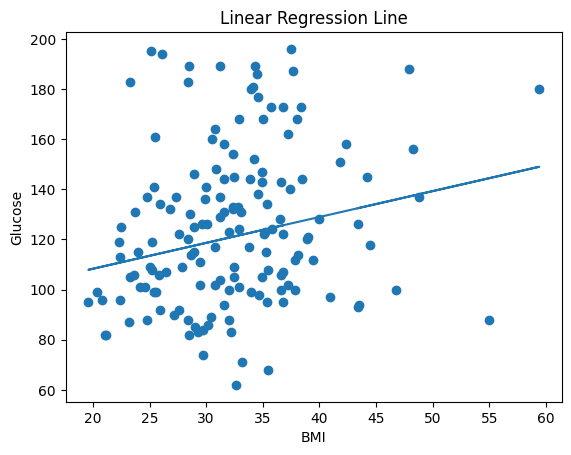

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Linear Regression Line")
plt.show()

Regression coefficient(Slope)

In [28]:
model.coef_


array([[1.03251219]])

Intercept

In [29]:
model.intercept_


array([87.67196575])

**INTERPRETATION**: The Linear Regression model performs poorly when using BMI to predict glucose levels.

The R² score is only 0.0326 (3.26%), which means that BMI explains almost none of the variation in glucose. In other words, glucose levels are not dependent on BMI in this dataset.

The Mean Squared Error (MSE) of 950.8 indicates that the model's predictions are far from the actual glucose values, which generally range from around 70 to 200 mg/dL. This confirms that the model is not reliable.

The regression coefficient (slope) is 1.03, a very small value, showing that BMI has almost no linear influence on glucose.

The intercept of 87.67 represents the predicted glucose level for someone with a BMI of zero, but it should not be interpreted as a biologically meaningful value but it simply helps position the regression line.

Overall, this analysis shows that BMI and glucose has a weak linear relationship, and therefore, the model performs poorly. This suggests that glucose levels depend on many other factors (diet, insulin sensitivity, medical conditions) and cannot be predicted using BMI alone.